# NOTEBOOK 3B - Plot Seasonal Forecasts.
### This script plots and compares the data-driven forecast with the ERA5 record.

In [7]:
# Import modules
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import scipy.stats as sp
import pandas as pd
import xarray as xr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.patches as mpatches
import ipywidgets as widgets

## STEP 1 - Open Data
### Determine the period over which to perform the validation

In [8]:
filename = f"Output/DDHWSF_Forecasts_LR_19792021.csv"
df_DDHWSF = pd.read_csv(filename)
preds_DDHWSF=df_DDHWSF.NDQ90_predictions
print (preds_DDHWSF)

filename = "Output/NumberHWdays_ERA5_Cluj-Napoca_thresh90_dur3.csv"
df_DDHWSF = pd.read_csv(filename)
target_ERA5=df_DDHWSF.NumberHWDays
print (target_ERA5)


0      8.152919
1      8.103122
2      6.192261
3      9.961075
4      9.054505
5      9.597041
6     10.789687
7      8.799100
8      8.169393
9      9.350344
10    14.310410
11     8.288337
12     9.895773
13    11.397576
14    10.450705
15     8.461359
16    10.304363
17    10.408872
18    13.256792
19     9.718392
20    11.501864
21    10.643234
22    11.464676
23     8.611318
24    11.484081
25     8.011687
26    15.081205
27    13.546079
Name: NDQ90_predictions, dtype: float64
0      0.0
1     17.0
2      7.0
3      6.0
4      8.0
5     13.0
6      4.0
7     13.0
8      4.0
9      7.0
10     3.0
11     0.0
12     8.0
13     4.0
14    15.0
15     3.0
16     3.0
17    12.0
18    12.0
19    24.0
20     8.0
21    11.0
22    17.0
23     9.0
24     9.0
25     8.0
26    14.0
27     3.0
Name: NumberHWDays, dtype: float64


## STEP 1 - Plot Forecasts and Skill Scores

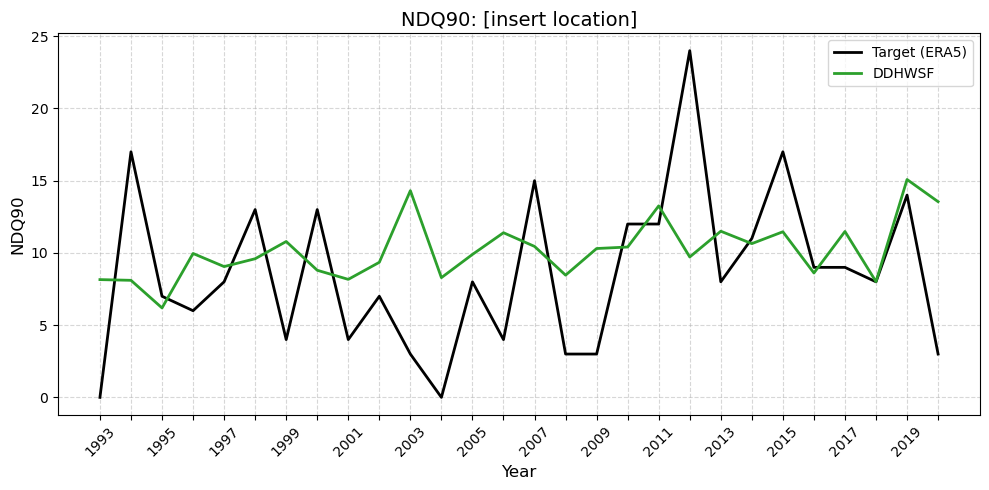

Correlation Skill Score:  0.09207576785062656
Correlation p-value:  0.6412170414831939
RMSE:  5.946028547186926  days


In [9]:
plt.figure(figsize=(10, 5))

# Generate x-axis
years = range(1993,2020+1)

# Plot each line with labels
target_line,=plt.plot(
    years,
    target_ERA5,
    'k-',
    label='Target (ERA5)',
    linewidth=2
)

dd_line,=plt.plot(
    years,
    preds_DDHWSF,
    color='tab:green',
    label='DDHWSF',
    linestyle='-',
    linewidth=2
)

# Add grid, legend, and labels
plt.grid(True, linestyle='--', alpha=0.5)

box_legend = mpatches.Patch(facecolor='lightblue', edgecolor='navy', label='C3S Ensemble')
plt.legend(handles=[target_line, dd_line])

plt.xlabel('Year', fontsize=12)
plt.ylabel('NDQ90', fontsize=12)
plt.title('NDQ90: [insert location]', fontsize=14)
plt.xticks(ticks=years, labels=[str(y) if y % 2 == 1 else "" for y in years], rotation=45)
plt.tight_layout()

plt.show()

corr=sp.pearsonr(target_ERA5,preds_DDHWSF)
print ("Correlation Skill Score: ", corr[0])
print ("Correlation p-value: ", corr[1])
print ("RMSE: ", np.sqrt(mean_squared_error(target_ERA5,preds_DDHWSF))," days")